## *This script contains:*
### 1. Importing Libraries and Dataset
### 2. Elbow technique
### 3. k-means clustering
### 4. Visualizations:
#### 4.1 Bar plot
#### 4.2. Scatter plot (2 Features)
### 5. Descriptive statistics for Clusters

# 1. Importing libraries and dataset:

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [116]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [117]:
# Import the house sales data
path = r'C:\Users\hp\House Sales in King County, USA'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_for_visualizations.csv'), index_col = False)

In [118]:
# Convert lot size from sqft to acres 
# 43560 sqft = 1 acre
df['lot_size_acres'] = df['sqft_lot'] / 43560

In [119]:
df.shape

(21612, 25)

In [120]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,house_age,years_since_renovation,price_category,lot_size_acres
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,69,69,Middle price,0.129706
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,73,33,Middle price,0.166253
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,91,91,Middle price,0.229568
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,59,59,Middle price,0.114784
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429,37,37,Middle price,0.185491


In [121]:
df.dtypes

date                       object
price                     float64
bedrooms                    int64
bathrooms                 float64
sqft_living                 int64
sqft_lot                    int64
floors                    float64
waterfront                  int64
view                        int64
condition                   int64
grade                       int64
sqft_above                  int64
sqft_basement               int64
yr_built                    int64
yr_renovated                int64
zipcode                     int64
lat                       float64
long                      float64
sqft_living15               int64
sqft_lot15                  int64
price_per_sqft            float64
house_age                   int64
years_since_renovation      int64
price_category             object
lot_size_acres            float64
dtype: object

In [122]:
sub_numerical= df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'condition', 'grade','price_per_sqft', 'house_age', 'years_since_renovation','lot_size_acres']]

In [123]:
sub_numerical.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,price_per_sqft,house_age,years_since_renovation,lot_size_acres
0,221900.0,3,1.00,1180,1.0,0,3,7,188.050847,69,69,0.129706
1,538000.0,3,2.25,2570,2.0,0,3,7,209.338521,73,33,0.166253
2,180000.0,2,1.00,770,1.0,0,3,6,233.766234,91,91,0.229568
3,604000.0,4,3.00,1960,1.0,0,5,7,308.163265,59,59,0.114784
4,510000.0,3,2.00,1680,1.0,0,3,8,303.571429,37,37,0.185491


In [124]:
#standardizing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sub_numerical)

In [125]:
#Double-Check the Standardized Data
sub_numerical.describe()

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,price_per_sqft,house_age,years_since_renovation,lot_size_acres
count,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,5.401775e+05,3.369471,2.114774,2079.921016,1.494332,0.234314,3.409356,7.656904,264.177710,52.993753,50.612761,0.346818
std,3.673701e+05,0.907982,0.770177,918.456818,0.539991,0.766334,0.650668,1.175477,110.099458,29.373636,28.806961,0.950905
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,1.000000,1.000000,87.588235,9.000000,9.000000,0.011938
25%,3.218375e+05,3.000000,1.750000,1426.500000,1.000000,0.000000,3.000000,7.000000,182.287533,27.000000,25.000000,0.115702
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,3.000000,7.000000,244.626805,49.000000,47.000000,0.174908
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,4.000000,8.000000,318.370105,73.000000,70.000000,0.245368
max,7.700000e+06,11.000000,8.000000,13540.000000,3.500000,4.000000,5.000000,13.000000,810.138889,124.000000,124.000000,37.909986


# 2. Elbow technique: 

In [127]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.

In [128]:
# Define a list of inertia values for each k-means clustering model
inertia = []

for i in num_cl:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(sub_numerical)
    inertia.append(kmeans.inertia_)

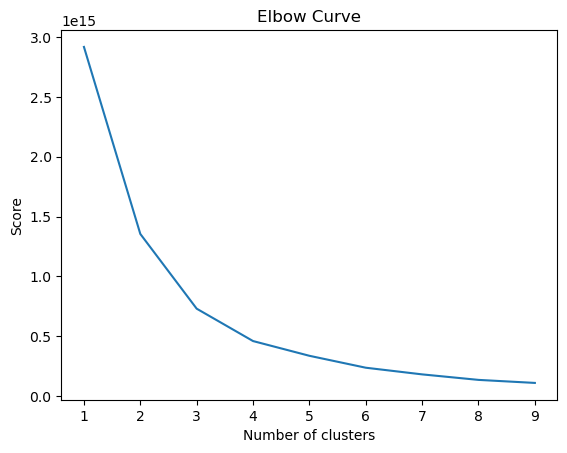

In [129]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,inertia)
pl.title('Elbow Curve')
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.show()

Based on the elbow curve, the optimal number of clusters appears to be **3**. Here’s why:
##### Elbow Point:
The plot shows a significant drop in the inertia value between 1 and 3 clusters, indicating that dividing the data into 3 groups reduces within-cluster variance substantially. After 3 clusters, the decrease in inertia becomes more gradual, showing diminishing returns.
##### Interpretability and Overfitting:
Using too many clusters can lead to overfitting, where each cluster represents very specific patterns, making the results less generalizable. Choosing 3 clusters strikes a balance between capturing meaningful groupings and avoiding over-complication.
##### Practicality:
Having a manageable number of clusters (e.g., 3) often aids in interpreting and applying the results, particularly in exploratory analysis or business decision-making contexts

# 3. k-means clustering

In [132]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [133]:
# Fit the k-means object to the data.
kmeans.fit(sub_numerical)

KMeans(n_clusters=3)

In [134]:
# Ensure sub_numerical is a copy of the original DataFrame
sub_numerical = sub_numerical.copy()
# Create new column in dataframe to show the clusters
sub_numerical['clusters'] = kmeans.fit_predict(sub_numerical)
sub_numerical.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,price_per_sqft,house_age,years_since_renovation,lot_size_acres,clusters
0,221900.0,3,1.00,1180,1.0,0,3,7,188.050847,69,69,0.129706,1
1,538000.0,3,2.25,2570,2.0,0,3,7,209.338521,73,33,0.166253,1
2,180000.0,2,1.00,770,1.0,0,3,6,233.766234,91,91,0.229568,1
3,604000.0,4,3.00,1960,1.0,0,5,7,308.163265,59,59,0.114784,0
4,510000.0,3,2.00,1680,1.0,0,3,8,303.571429,37,37,0.185491,1


In [135]:
sub_numerical['clusters'].value_counts()

clusters
1    15104
0     5904
2      604
Name: count, dtype: int64

# 4. Visualizations: 

## 4.1 Bar Plot:

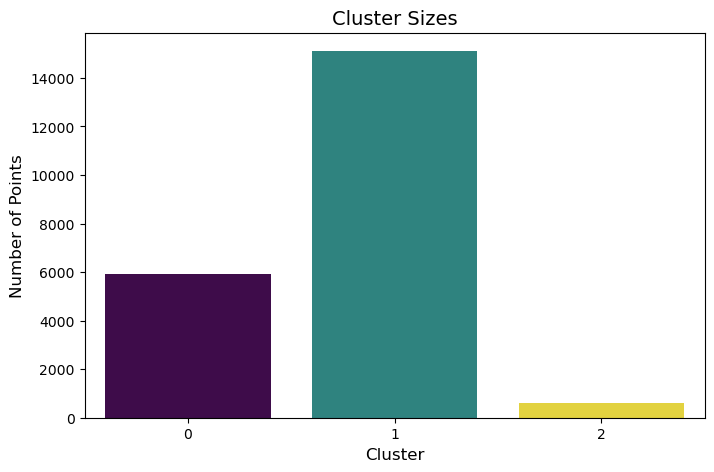

In [138]:
# Bar plot of cluster sizes
cluster_counts = sub_numerical['clusters'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='viridis', dodge=False, legend=False)
plt.title('Cluster Sizes', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Points', fontsize=12)
plt.show()

#### Insights: 
**Imbalanced Cluster Sizes:**
Cluster 0 is significantly larger than Cluster 1 and Cluster 2. 

**This might indicate:** 
- The data naturally has one dominant grouping.
- K-means might be influenced by the density or spread of the data.

## 4.2 Scatter plot (2 Features)

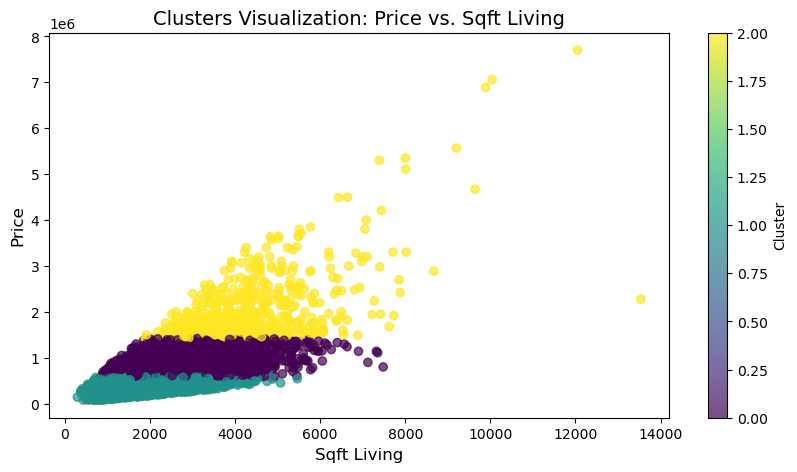

In [141]:
# Scatter plot of two features
plt.figure(figsize=(10, 5))
plt.scatter(sub_numerical['sqft_living'], sub_numerical['price'], c=sub_numerical['clusters'], cmap='viridis', alpha=0.7)
plt.title('Clusters Visualization: Price vs. Sqft Living', fontsize=14)
plt.xlabel('Sqft Living', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

#### Insights: 
##### Cluster Distribution:
- The yellow cluster (Cluster 2) seems to group data points with mid-range sqft_living and price values.
- The purple cluster (Cluster 0) represents data points with smaller sqft_living and lower price values.
- The teal cluster (Cluster 1) appears to capture properties with higher prices, with sqft_living values that span a broad range
#####  Interpretation:
These clusters may represent different market segments:
- Cluster 0 (Purple): Affordable properties with smaller living spaces.
- Cluster 2 (Yellow): Mid-range homes with moderate sizes and prices.
- Cluster 1 (Teal): High-end properties with a mix of larger spaces and higher prices.

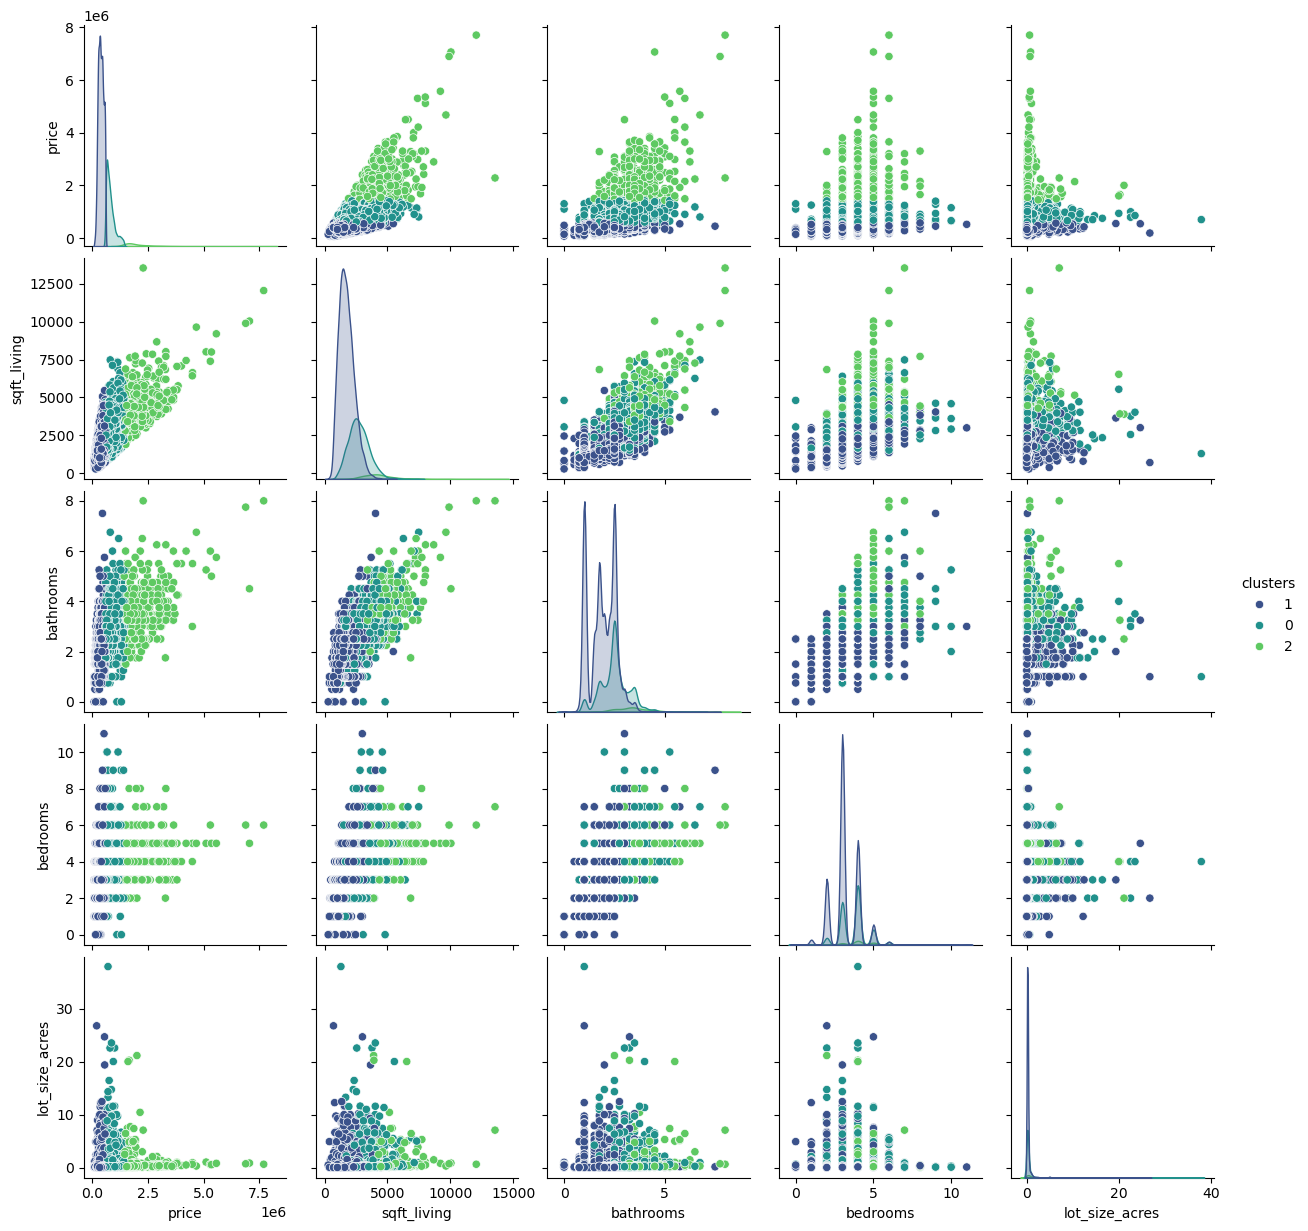

In [143]:
# Add clusters column to the original data
sub_numerical['clusters'] = sub_numerical['clusters'].astype(str)  # Convert to string for color distinction

# Select a few relevant features for visualization
features_to_plot = ['price', 'sqft_living', 'bathrooms', 'bedrooms', 'lot_size_acres']
sns.pairplot(sub_numerical[features_to_plot + ['clusters']], hue='clusters', palette='viridis', diag_kind='kde')
plt.show()

From the cluster visualizations, we can draw several insights:

#### 1. Price and Square Footage Relationship
The scatter plot between price and sqft_living indicates a positive correlation: as the living area size increases, the price generally increases.
Clusters segregate data into three clear segments:
- Cluster 0: Concentrates around smaller homes with lower prices.
- Cluster 1: Represents the smallest group, consisting of larger homes and higher prices (luxury homes).
- Cluster 2: Includes mid-range properties in both size and price.
#### 2. Bedrooms and Bathrooms Distribution
- Cluster 1 has a relatively higher concentration of homes with more bathrooms and bedrooms, consistent with higher prices and larger properties.
- Cluster 0 mainly represents properties with 2-4 bedrooms and 1-2 bathrooms, typical of entry-level or average homes.
#### 3. Lot Size
The scatter plots for lot_size_acres show that:
- Most properties have smaller lot sizes across all clusters.
- Cluster 1 shows a few properties with significantly larger lot sizes, aligning with luxury homes on expansive properties.
#### 4. Density and Distribution
The diagonal plots (density plots) reveal that most properties in all clusters are within the lower range for all attributes.
Cluster 2 (mid-range homes) spans a larger range of property sizes and prices compared to Cluster 0 but is still distinct from Cluster 1.
#### 5. Outliers
Some outliers in all clusters can be observed, particularly for price and lot size, which indicate rare or extreme cases (e.g., luxury estates or oversized lots).
#### General Insights
The clustering results effectively segment the housing market into three categories:
- Entry-level/Average Homes (Cluster 0): Small properties with lower prices and typical features.
- Mid-range Properties (Cluster 2): Moderately priced homes with better features (more square footage, bedrooms, and bathrooms).
- Luxury Properties (Cluster 1): High-end homes with high prices, large lot sizes, and more rooms.

# 5. Descriptive statistics for Clusters

In [146]:
pd.set_option('display.max_columns', None) # Displays all columns when it prints the results

sub_numerical.loc[sub_numerical['clusters'] == 2, 'clusters'] = 'dark purple'
sub_numerical.loc[sub_numerical['clusters'] == 1, 'clusters'] = 'purple'
sub_numerical.loc[sub_numerical['clusters'] == 0, 'clusters'] = 'pink'
sub_numerical.groupby('clusters').agg({'price':['mean', 'median'], 
                         'bedrooms':['mean', 'median'], 
                         'bathrooms':['mean', 'median'],
                         'sqft_living':['mean', 'median'],
                          'floors' :['mean', 'median'],
                          'view' :['mean', 'median'],     
                          'condition':['mean', 'median'],
                         'grade':['mean', 'median'],
                         'price_per_sqft':['mean', 'median'],
                        'house_age':['mean', 'median'], 
                        'years_since_renovation':['mean', 'median'],
                       'lot_size_acres':['mean', 'median'] })

price             bedrooms        bathrooms         \
                  mean     median      mean median      mean median   
clusters                                                              
0         8.099542e+05   753000.0  3.736111    4.0  2.518039    2.5   
1         3.750713e+05   370000.0  3.193790    3.0  1.902791    2.0   
2         2.031904e+06  1800000.0  4.178808    4.0  3.473924    3.5   

          sqft_living            floors             view        condition  \
                 mean  median      mean median      mean median      mean   
clusters                                                                    
0         2723.926491  2650.0  1.673103    2.0  0.453930    0.0  3.457317   
1         1738.100040  1660.0  1.409693    1.0  0.096465    0.0  3.387579   
2         4332.662252  4155.0  1.863411    2.0  1.534768    1.0  3.485099   

                     grade        price_per_sqft              house_age  \
         median       mean median           mean      median       mean   
clusters                                                                  
0           3.0   8.526084    8.0     318.608509  294.117647  51.727812   
1           3.0   7.213122    7.0     234.097298  213.105122  53.652873   
2           3.0  10.258278   10.0     484.335177  468.401906  48.885762   

                years_since_renovation        lot_size_acres            
         median                   mean median           mean    median  
clusters                                                                
0          45.0              47.758299   38.0       0.447892  0.184252  
1          53.0              52.096001   49.5       0.295056  0.171602  
2          37.0              41.423841   29.0       0.653218  0.305751

#### Insights:
##### Cluster 0: Smaller, simpler homes that are affordable and may appeal to first-time buyers or those on a budget.
##### Cluster 1: High-end luxury homes with larger living spaces, more rooms, better grades, and often better views or premium conditions.
##### Cluster 2: Mid-range homes that are family-oriented, with moderate sizes, decent finishes, and pricing.

In [175]:
sub_numerical.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_for_clusters.csv'), index=False)